# What is this project about?

My objective was to evaluate the distribution of COVID-19 cases and compare them with the distribution of cases of Severe Acute Respiratory Syndrome (SARS), caused by several respiratory viruses. Thus, evaluating the behavior of these two manifestations and causative agents, with the intention of raising awareness for the future of the COVID-19 pandemic in Brazil.

**Definition of some terms**:
1. Severe Acute Respiratory Syndrome (SARS) - severe respiratory complication that can be caused by several respiratory viruses (Influenza, Parainfluenza, SARS-CoV, etc.);
2. COVID-19 - disease caused by SARS-CoV-2, pandemic 2020;
3. SARS - disease caused by SARS-CoV, registered in the years 2002 and 2003.
<br> **Important**: The term SARS in English is equivalent to the translation of the term SRAG. In this notebook, the terms SARS and SRAG will be used with different meanings, mentioned in items 1 and 2.
4. Epidemiological week - Standard reporting form for some epidemiological data.

> By international convention, epidemiological weeks are counted from Sunday to Saturday. The first week of the year is the one that contains the greatest number of days in January and the last one that contains the greatest number of days in December. [Source (PT-BR)](https://www.saude.go.gov.br/acesso-a-informacao/712-suvisa/vigil%C3%A2ncia-epidemiol%C3%B3gica/8412-calend%C3%A1rio-epidemiol%C3%B3gico) 

## Guide for the notebook:
<font color='Gray'> >> </font> Text preceded by bigger than signs in <font color='Gray'> Gray </font> color represent general comments made by me. <br>
<font color='Red'> >> </font> Text preceded by bigger than signs in <font color='Red'> Red </font> color are  questions that I will try to answer. <br>
<font color='Blue'> >> </font> Text preceded by bigger than signs in <font color='Blue'> Blue </font> color are answers and hypotheses raised by me to answer the previous questions. <Br>
<font color='orange'> >> </font> Text preceded by bigger than signs in <font color='orange'> Orange </font> color are some necessary translation notes.

## Data sources

1. COVID-19 - Data were collected from the [Brasil.io](https://brasil.io/dataset/covid19/) initiative(referent to early November 2020), and the names of the selected databases are `caso.csv` and` caso_full.csv`;
2. Data on influenza and Severe Acute Respiratory Syndrome (SRAG) - were collected from the [InfoGripe](http://info.gripe.fiocruz.br/) initiative of FIOCRUZ, more specifically the base `serie_temporal_com_estimativas_recentes_sem_filtro_febre.csv` *;
*** 
**Observation**: the complete database contains a large number of entries, considering different levels of records. To use in my project, I processed the database previously, extracting more general data, at the level of: country, cases, both sexes, etc. Complete information on how I did this filtering can be found [here (PT-BR)](https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/dataset_gripe.ipynb). <BR>
**Observation2**: The Brasil.io initiative's database contained incomplete information for the latest available dates (at the time I downloaded it), so some graphs will bring a sharp drop in the indexes on those dates.
    
> [With incomplete data for 5 days, Brazil registers 264 deaths by Covid-19 (PT-BR)](https://oglobo.globo.com/sociedade/com-dados-incompletos-ha-5-dias-brasil-registra-264-mortes-por-covid-19-24737450) (published on of November 9).

Importando módulos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline

# Analyzing data from Covid-19

<font color='Gray'> >> </font> I decided to upload the file 'caso.csv.gz' to my [github](https://github.com/souzajvp/data_science_bootcamp/tree/main/modulo_01) to facilitate the import and automate the process for future readers.

In [2]:
url = 'https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/caso.csv.gz?raw=true'
dados = pd.read_csv(url, compression='gzip')

In [3]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,NaN,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,NaN,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,NaN,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,NaN,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


### <font color='Gray'> >> </font> Analyzing the null values of the base `caso.csv`

First, let's take a look at the missing data and variables present in this dataset ...

In [4]:
dados.isnull().sum(axis=0)

date                                  0
state                                 0
city                               6383
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3672
estimated_population               3672
city_ibge_code                     3672
confirmed_per_100k_inhabitants    16999
death_rate                            0
dtype: int64

<font color='Blue'> >> </font>**We note how the columns with `NaN` values are:**
***
 - city;
 - estimated_population_2019;
 - estimated_population;
 - city_ibge_code;
 - confirmed_per_100k_inhabitants.
 

<font color='Red'> >> </font> Okay, but what about **data types** in each column? </font>

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940388 entries, 0 to 940387
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            940388 non-null  object 
 1   state                           940388 non-null  object 
 2   city                            934005 non-null  object 
 3   place_type                      940388 non-null  object 
 4   confirmed                       940388 non-null  int64  
 5   deaths                          940388 non-null  int64  
 6   order_for_place                 940388 non-null  int64  
 7   is_last                         940388 non-null  bool   
 8   estimated_population_2019       936716 non-null  float64
 9   estimated_population            936716 non-null  float64
 10  city_ibge_code                  936716 non-null  float64
 11  confirmed_per_100k_inhabitants  923389 non-null  float64
 12  death_rate      

<font color='Blue'> >> </font> We notice how the missing numbers of `estimated_population_2019`,` estimated_population` and `city_ibge_code` are the same

In [6]:
dados.query('city_ibge_code == "NaN"').city.value_counts()

Importados/Indefinidos    3672
Name: city, dtype: int64

<font color='Blue'> >> </font> Apparently, these 3672 missing data are actually from cases classified as "Importados/Indefinidos" origin. <br>
<font color='orange'> >> </font>: Importados/Indefinidos means "Imported/Undefined" in englsih.

<font color='Red'> >> </font> But what about the missing data in the `city` column?

In [7]:
city_null_pop = dados[dados['city'].isnull() == True]['estimated_population'].unique()

In [8]:
print(f'We have {len(city_null_pop)}  unique values in the estimated_population column that has null values in the city column' )
print(f'And these are the unique values \n {city_null_pop}')

We have 27  unique values in the estimated_population column that has null values in the city column
And these are the unique values 
 [  861773.   894470.  4207714.  3055149.  3351543.  9187103.  4064052.
 14930634.  2809394.  7114598.  7113540.  3526220.  8690745.  4039277.
  9616621. 21292666.  3281480.  1796460. 17366189.  3534165. 11516840.
   631181.  2318822.  7252502. 11422973.  1590248. 46289333.]


<font color='Blue'> >> </font> Apparently, the lines that contain null data for `city` are lines containing updates for each state.

## <font color='Gray'> >> </font> Grouping data at the state level

<font color='Gray'> >> </font> The `case.csv` database contains segmented data at the municipality or state level. Thanks to [@reiskleiton] (https://github.com/reiskleiton) for helping with this code.

In [9]:
# creating a copy of the dataset
dados_covid_estados = dados.copy()
# query to select only state data
dados_covid_estados = dados_covid_estados.query("place_type == 'state' ")
# removing the city variable
dados_covid_estados.drop('city', axis= 1, inplace= True)
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


<font color='Gray'> >> </font> Now **we will create two new columns**, containing the new cases [`new_cases`] and new deaths [` new_deaths`] in each entry.
***
This is done using the `.diff()` function which subtracts the values from one entry followed by the other. Thanks to the @reiskleiton code, this can be done automatically for the entire DF at once.

In [10]:
# ordering the dataset by date
dados_covid_estados.sort_values(by=['state', 'date'], ascending=True, inplace=True)
# creating a list to hold every state on the dataset
lista_estados = dados_covid_estados.state.unique()
# creating one list of lists to hold the new cases using the diff function for every state
novos_casos = [dados_covid_estados.query('state == @estado')['confirmed'].diff() for estado in lista_estados]
novos_obitos = [dados_covid_estados.query('state == @estado')['deaths'].diff() for estado in lista_estados]
# creating the new variables [[new_cases, new_deaths]] on the dataframe
dados_covid_estados['new_cases'] = [item for lista_estados in novos_casos for item in lista_estados]
dados_covid_estados['new_deaths'] = [item for lista_estados in novos_obitos for item in lista_estados]

dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,new_cases,new_deaths
3562,2020-03-17,AC,state,3,0,1,False,881935.0,894470.0,12.0,0.33539,0.0,NaN,NaN
3561,2020-03-18,AC,state,3,0,2,False,881935.0,894470.0,12.0,0.33539,0.0,0.0,0.0
3560,2020-03-19,AC,state,4,0,3,False,881935.0,894470.0,12.0,0.44719,0.0,1.0,0.0
3559,2020-03-20,AC,state,7,0,4,False,881935.0,894470.0,12.0,0.78259,0.0,3.0,0.0
3558,2020-03-21,AC,state,11,0,5,False,881935.0,894470.0,12.0,1.22978,0.0,4.0,0.0


<font color='Gray'> >> </font> Next **we will create two other new columns**, containing the moving average of new cases [`media_movel_casos`] and new deaths [` media_movel_obitos`], using the columns created previously.

In [11]:
# Creating a list of lists of all new cases using the diff function for every state
mm_obitos = [dados_covid_estados.query('state == @estado')['new_deaths'].rolling(window=7).mean() for estado in lista_estados]
mm_casos = [dados_covid_estados.query('state == @estado')['new_cases'].rolling(window=7).mean() for estado in lista_estados]

# Creating a new variable to represent the moving average of cases [media_movel]
dados_covid_estados['media_movel_obitos'] = [item for lista_estados in mm_obitos for item in lista_estados]
dados_covid_estados['media_movel_casos'] = [item for lista_estados in mm_casos for item in lista_estados]


### <font color='Red'> >> </font>  Which states are the ones with highest confirmed cases?

In [12]:
print('States with highest COVID-19 confirmed cases* \n')
display(dados_covid_estados.query('is_last == True').sort_values(by='confirmed', ascending=False)[['state', 'confirmed']].head())
print('\n *Number of confirmed cases until the date of download of this dataset (early november)')

States with highest COVID-19 confirmed cases* 



,state,confirmed
825491,SP,1125936
373883,MG,368609
89828,BA,362563
551278,RJ,315348
40144,CE,278053



 *Number of confirmed cases until the date of download of this dataset (early november)


In [13]:
# Filtering the dataset for only steates with the highests case count
dados_covid_estados_top5 = dados_covid_estados.query('state == "SP" | state == "MG"| state == "BA" | state == "RJ" | state == "CE"')

# Setting date as index
dados_covid_estados_top5.set_index('date', inplace=True)

# Creating a DF to use the index more efficiently
a = dados_covid_estados_top5.query('state == "MG"')

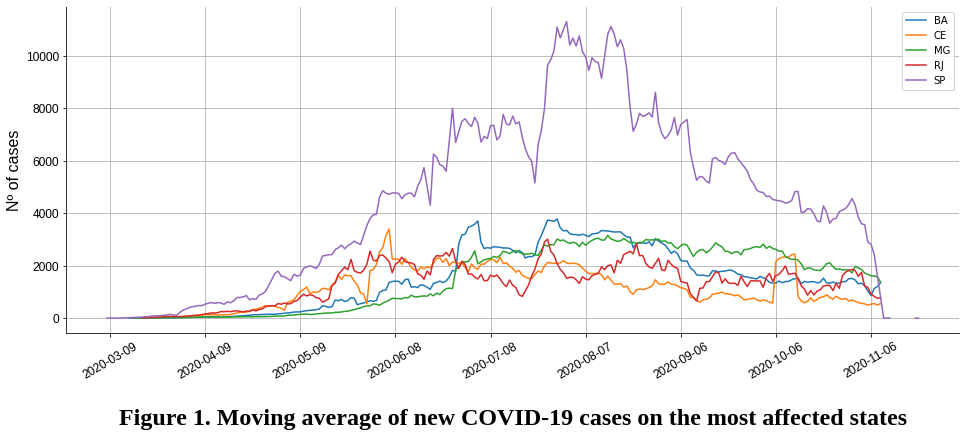

In [14]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=dados_covid_estados_top5.index, y=dados_covid_estados_top5['media_movel_casos'], 
                  data=dados_covid_estados_top5, hue='state')
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figure 1. Moving average of new COVID-19 cases on the most affected states',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Nº of cases', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(a.index), 30)]
  
l = []
for i in pos:
    l.append(a.index[i])

plt.grid()
ax.set(xticks=pos, xticklabels=l);

plt.legend();

<font color = 'Blue'> >> </font> Here we see how São Paulo, Minas Gerais, Rio de Janeiro, Ceará and Bahia are the 5 states with the highest number of cases in Brazil. Among these states, **we can highlight SP and MG**, which are the two most populous states in Brazil and this population size alone can influence the number of new cases. <br>
We know that the state of SP was one of the ports of entry for the virus in Brazil, and this may have influenced this growth and number of cases. In addition, the state of SP is the richest and performs the largest number of tests, which favors the accounting of cases. <br>


<font color = 'Blue'> >> </font> Considering these factors that can influence the total number of registered cases, this number alone does not tell us much. Analyzing the number of deaths**¹** and the mortality of the virus in each state can give us a better idea of the real situation faced.

**¹**Brazil has a bad record on COVID-19 testing since the start of the pandemic, thus using the number of confirmed COVID-19 cases might not be the best option. On the other hand, patients that unfortunately evolve to death are often tested and this number can be more reliable.

#### <font color='Red'> >> </font> What if we considered the proportion of cases for each 100k inhabitant?

In [15]:
dados_covid_estados.query('is_last == True').sort_values(by='confirmed_per_100k_inhabitants', ascending=False)[['state', 'confirmed_per_100k_inhabitants']].head()

,state,confirmed_per_100k_inhabitants
655093,RR,9357.85456
19833,DF,7065.12186
0,AP,6130.61676
805771,TO,4825.59953
258284,MT,4160.20555


<font color = 'Blue'> >> </font> When we take into account the cases for every 100 thousand inhabitants, the Top 5 most affected states changes completely. <br>

<font color = 'Gray'> >> </font> It is important to highlight that **states that have small populations** will have disproportionate rates when using this type of comparison. An example is Roraima (RR), which its the state with the lowest population in Brazil. <br>

### <font color='Red'> >> </font>  How about the mortality rates? Do we see any repetition of states ?

#### <font color='Red'> >> </font> Total deaths

In [16]:
print('States with the highest number of COVID-19 deaths*')
display(dados_covid_estados.query('is_last == True').sort_values(by='deaths', ascending=False)[['state', 'deaths']].head())
print('*Amount of deaths based on the date of dowload of this dataset (early november)')

States with the highest number of COVID-19 deaths*


,state,deaths
825491,SP,39717
551278,RJ,20905
40144,CE,9395
373883,MG,9204
337660,PE,8724


*Amount of deaths based on the date of dowload of this dataset (early november)


In [17]:
mortes_estados_top = dados_covid_estados.query('state == "SP" | state == "MG"| state == "PE" | state == "RJ" | state == "CE"')

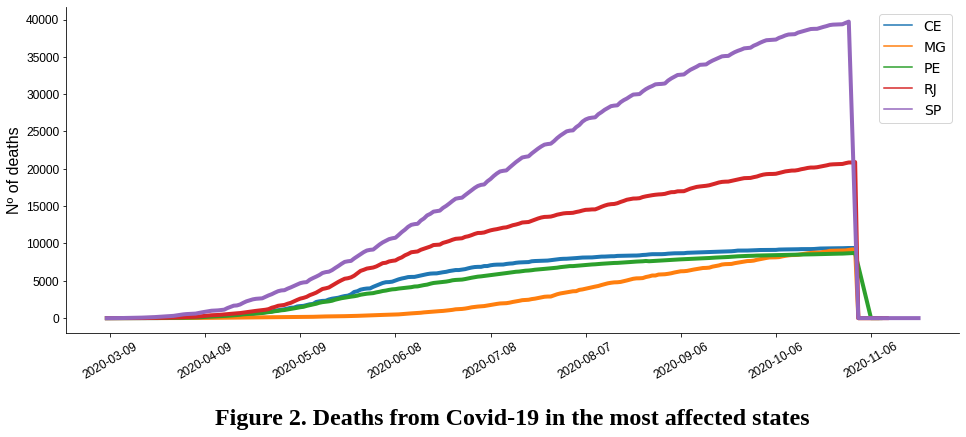

In [18]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=mortes_estados_top['date'], 
                  y=mortes_estados_top['deaths'], 
                  data=mortes_estados_top, hue='state', linewidth=4)
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figure 2. Deaths from Covid-19 in the most affected states', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Nº of deaths', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(a.index), 30)]
  
l = []
for i in pos:
    l.append(a.index[i])

ax.set(xticks=pos, xticklabels=l);

plt.legend(fancybox=True, fontsize=14,);

<font color = 'Blue'> >> </font> Unlike the total number of cases, Rio de Janeiro(RJ) and Ceará (CE) rise in the total rank of deaths. CE (9.6 million) and PE (~ 9 million) **stand out negatively**, since they do not have a population as large as the other ranked states (SP 46.2M; MG 21.3M; RJ 17.3M) and yet have a high number of deaths.

#### <font color='Red'> >> </font> Mortality

In [19]:
print('States with the highest mortality rates*')
display(dados_covid_estados.query('is_last == True').sort_values(by='death_rate', ascending=False)[['state', 'death_rate']].head())
print('Amount of deaths based on the date of dowload of this dataset (early november)')

States with the highest mortality rates*


,state,death_rate
551278,RJ,0.0663
337660,PE,0.0526
825491,SP,0.0353
40144,CE,0.0338
569926,RN,0.0315


Amount of deaths based on the date of dowload of this dataset (early november)


<font color = 'Blue'> >> </font> When we take mortality into account, Rio de Janeiro rises to the first place in the ranking.
***
<font color = 'Gray'> >> </font> During the past few months, the media has released several news publications showing how critical the situation in Rio de Janeiro (RJ) state was. An important factor that may have influenced the higher mortality in RJ are the populations living in communities (especially in the capital of RJ). These groups are more vulnerable, with higher demographic densities, less capacity for social distance, less access to treated water and several other factors that can influence mortality from an infectious disease transmitted by air droplets. An example of the vulnerability of these groups is the *Jacarezinho* community, which concentrates the highest rates of Tuberculosis in Brazil, a disease transmitted similarly to COVID-19, but caused by a bacterium.
> * [Rio: 1,4 thousand deaths by COVID-19 were from slums (PT-BR)](https://agenciabrasil.ebc.com.br/geral/noticia/2020-08/rio-14-mil-mortes-por-covid-19-foram-em-favelas-mostra-painel)
> * [Favela in RJ with the highest tuberculosis focus in the country has few defenses against coronavirus (PT-BR)](https://noticias.uol.com.br/reportagens-especiais/comunidade-no-rio-tem-50-casos-de-tuberculose-e-poucas-defesas-contra-o-coronavirus/#cover)



In [20]:
mortalidade_estados_top =  dados_covid_estados.query('state == "SP" | state == "RN"| state == "PE" | state == "RJ" | state == "CE"')

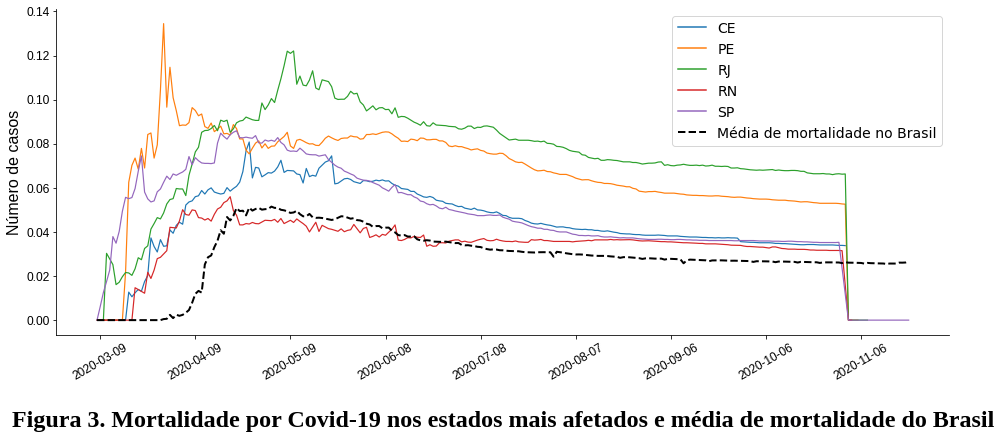

In [21]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=mortalidade_estados_top['date'], 
                  y=mortalidade_estados_top['death_rate'], 
                  data=mortalidade_estados_top, hue='state', linewidth=1.2)
sns.despine()
ax2 = dados_covid_estados.groupby('date').mean()['death_rate'].plot(label='Média de mortalidade no Brasil', linestyle='dashed', color='black', linewidth=2)


plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 3. Mortalidade por Covid-19 nos estados mais afetados e média de mortalidade do Brasil', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(a.index), 30)]
  
l = []
for i in pos:
  l.append(a.index[i])

ax.set(xticks=pos, xticklabels=l);

plt.legend(fancybox=True, fontsize=14,);

<font color='Blue'> >> </font> No gráfico acima vemos como os estados com maiores índices de mortalidade na verdade apresentam índices maiores que o índice nacional. <br>
<font color='Blue'> >> </font>Além disso, vemos como a mortalidade por covid mostrou uma tendência de queda após o pico da pandemia, se mantendo mais estável. 

## COVID-19 at country-level

<font color='Gray'> >> </font> To assess Covid-19 data at the country level, I used the Brasil.io `casos_full` database.
*** 
In its original format, this base is too large for GitHub. So I processed it earlier, removing data at the municipality level and uploaded it to my GitHub

In [22]:
url = 'https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/casos_full_state.csv.gz?raw=true'
full_state = pd.read_csv(url, compression='gzip')

In [23]:
full_state.head()

,Unnamed: 0,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
1,3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
2,5,NaN,35.0,2020-02-27,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0
3,7,NaN,35.0,2020-02-28,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0
4,9,NaN,35.0,2020-02-29,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0


In [24]:
# Removing some unnecessary columns 
full_state.drop(['city', 'city_ibge_code', 'Unnamed: 0'], axis=1, inplace=True)

# Grouping the dataframe to obtain values at state-level
full_pais = full_state.groupby('date').sum()

# Creating two new columns to evaluate the moving average of new deaths a new cases
full_pais['media_movel_obitos']= full_pais['new_deaths'].rolling(7,1).mean() 
full_pais['media_movel_casos']= full_pais['new_confirmed'].rolling(7,1).mean() 

### <font color='Red'> >> </font> How did COVID-19's lethality vary in relation to the advancement of new cases?

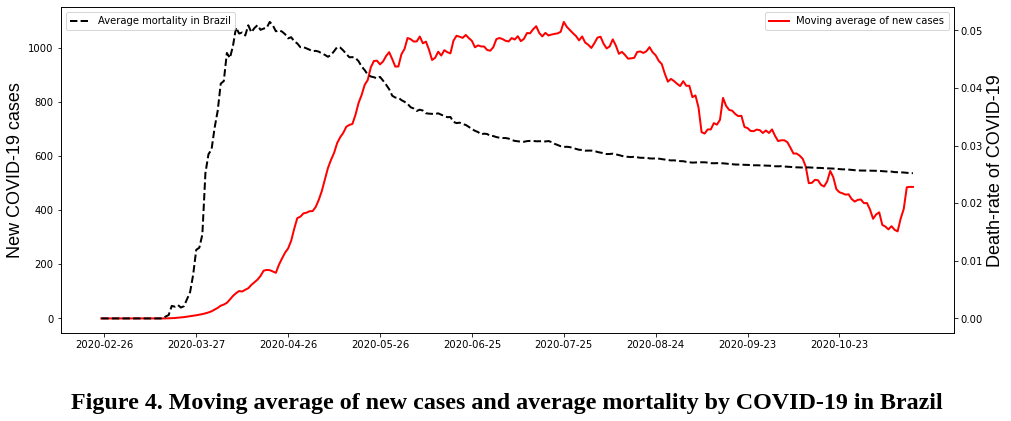

In [25]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8

ax1 = sns.lineplot(x=full_pais.index, y=full_pais['media_movel_obitos'], 
                  data=full_pais, color='red', linewidth=2, label='Moving average of new cases')

ax2 = fig.add_axes()
ax2 = ax1.twinx()
ax2 = full_state.groupby('date').mean()['last_available_death_rate'].plot(label='Average mortality in Brazil',
                                                                          linestyle='dashed', color='black', 
                                                                          linewidth=2)

ax1.set_ylabel('New COVID-19 cases', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Death-rate of COVID-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('')

plt.legend(loc='upper left')
plt.title('Figure 4. Moving average of new cases and average mortality by COVID-19 in Brazil',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.25)
# Creating xticks separated by 30:
pos = [i for i in range(1, len(full_pais.index), 30)]

l = []
for i in pos:
    l.append(full_pais.index[i])

ax1.set(xticks=pos, xticklabels=l);
ax1.legend(loc='upper right')
plt.show()

<font color = 'Blue'> >> </font> In the chart above, we see how the behavior of the variables in question is quite different. While in the first ~ 4 months of the pandemic, we had high mortality rates, the mortality rate dropped to a stable rate starting in July. At the same time, the number of new cases has decreased since the observed peak. <br>


<font color = 'Blue'> >> </font>**Possible explanations for these phenomena**:
1. Scientific knowledge and clinical experience about patients with severe forms of COVID-19 has increased, making health professionals better prepared to save lives;
2. The saturation of the health system observed in different locations meant that not all patients could be seen. In extreme situations, health professionals were obliged to prioritize younger patients or those with a greater chance of recovery, to the detriment of others;
3. At the beginning of the pandemic, few health centers had the quantity and complexity of equipment (eg, mechanical ventilators) and adequate supplies to provide sufficient care to patients;
4. Possible influence of **climate** on viral transmission and the consequent increase in cases - this topic will be discussed in more detail below.

***

**Obs**: It is important to note that even if the world is more equipped and prepared to deal with COVID-19, a situation where we will have a large number of infected people in a short period of time can be catastrophic.

# <font color = 'Red'> >> </font> Is there a chance for Covid-19's second wave? Or rather ... Should we be concerned with the second wave?

<font color = 'Blue'> >> </font> As seen in the graphs above, the number of new daily cases of COVID-19 and death rates from the disease have reduced considerably since the peak of the pandemic in the country. Even so, we continue to record many daily deaths and, unfortunately, it is estimated that the real number of cases is much higher [(at least 5 times)](https://ciis.fmrp.usp.br/covid19-subnotificacao/) that the reported. <br>

**Although this issue is far from trivial**, we have some worrying evidence about the future of the pandemic. 

The beginning of 2020 was marked as the beginning of the COVID-19 pandemic in Asia and the northern hemisphere. This period was also consistent with the **end of the winter in the northern hemisphere** and the beginning of warmer temperatures. <br>
Now, Europe is experiencing weeks of consecutive increases in COVID-19 cases, even breaking records set earlier this year. As such, several countries have already established partial or complete "lockdowns" in the most affected regions. Considering the coming to winter in the northern hemisphere, the **relationship between seasonality** and covid is becoming clearer.
***
Another disease that has been used as a comparison for COVID-19, is the Flu. Several viruses can cause flu-like symptoms, as well as Severe Acute Respiratory Syndrome (SARS), the most severe manifestation. Thus, I decided to also evaluate data on Severe Acute Respiratory Syndrome reported in years prior to the pandemic.

## SARS at country level

<font color='gray'> >> </font> As previously reported, I collected the full SRAG database and made some modifications to reduce the file size, as well as facilitate work here.

**Important:** Unlike what happens in the COVID-19 pandemic, mass testing of the population was not carried out for other viruses that cause SARS (Influenza, Parainfluenza virus, etc.). Thus, there are no data available that are on the same scale as the covid-19 testing data. So, in my judgment, the fairest thing is to compare the deaths caused by SRAG-non-COVID (from the InfoGripe base) versus those caused by COVID-19 (Brasil.io).

In [26]:
url = 'https://raw.githubusercontent.com/souzajvp/data_science_bootcamp/main/modulo_01/gripe_pais_media.csv'
gripe_pais = pd.read_csv(url)

In [27]:
gripe_pais.columns

Index(['data de publicação', 'UF', 'Unidade da Federação', 'Tipo', 'dado',
       'escala', 'Ano epidemiológico', 'Semana epidemiológica',
       'Situação do dado',
       'Casos semanais reportados até a última atualização',
       'limite inferior da estimativa', 'casos estimados', 'média móvel',
       'limite superior da estimativa', 'Percentual em relação ao país',
       'População', 'limiar pré-epidêmico', 'intensidade alta',
       'intensidade muito alta', 'nível semanal', 'nível por média móvel'],
      dtype='object')

In [28]:
# Some columns are not necessary
gripe_pais = gripe_pais.drop(['Situação do dado', 'Tipo', 'escala', 'data de publicação', 'UF', 'Unidade da Federação' ], axis=1)

In [29]:
gripe_pais.dado.unique()

array(['srag', 'sragflu', 'sragcovid', 'obito', 'obitoflu', 'obitocovid'],
      dtype=object)

<font color = 'gray'> >> </font> We noticed how there are different classifications for our data and as stated earlier, I will work only with deaths. I will make the following separation:
* Deaths caused by SRAG - `obito` dataframe

In [30]:
obito = gripe_pais.query("dado == 'obito'")

### <font color='red'> >> </font> How is the distribution of deaths by SARS in each epidemiological week?

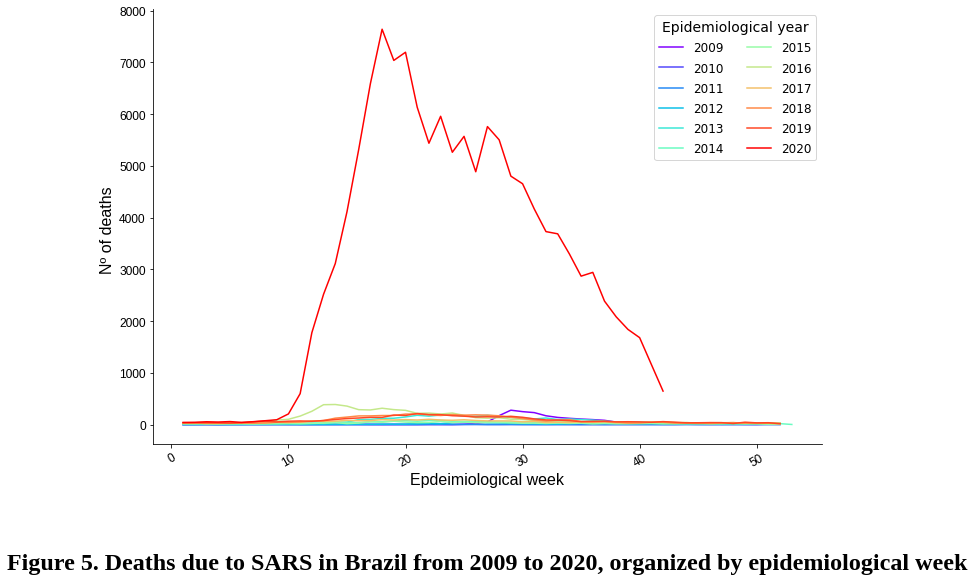

In [31]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=obito, x='Semana epidemiológica', y='Casos semanais reportados até a última atualização', hue='Ano epidemiológico', palette='rainbow')
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figure 5. Deaths due to SARS in Brazil from 2009 to 2020, organized by epidemiological week', 
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Nº of deaths ', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Epdeimiological week', fontsize=16, fontname="Liberation Sans")
sns.despine()
ax.legend([*obito['Ano epidemiológico'].unique()], fontsize=12, labelspacing=0.6, 
          title='Epidemiological year', title_fontsize=14, ncol=2)
# plt.legend(fontsize=12, columnspacing=0.6, labelspacing=0.6, title='Ano epidemiológico', title_fontsize=14)
plt.show()

<font color = 'blue'> >> </font> Making this simple plot above, we see how the year 2020 has a very disproportionate number of deaths from SRAG.

**Obs**: several infectious agents can cause SARS, however the SARS-CoV-2 virus appears to have a balance between lethality and ideal transmissibility to have caused this worldwide impact. As a comparison, the common influenza influenza virus is transmitted every 3 days, with an average lethality of [0.1%](https://www.who.int/news-room/qa-detail/coronavirus-disease-covid-19 -similarities-and-differences-with-influenza). In comparison, SARS-CoV2 is transmitted every 5 or 6 days and the average mortality rate in Brazil is [2.8%](https://covid.saude.gov.br/).

### <font color='Red'> >> </font> Removing 2020 for a fairer comparison

In [32]:
obito['Ano epidemiológico'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [33]:
obito = obito.query('`Ano epidemiológico` != "2020"')

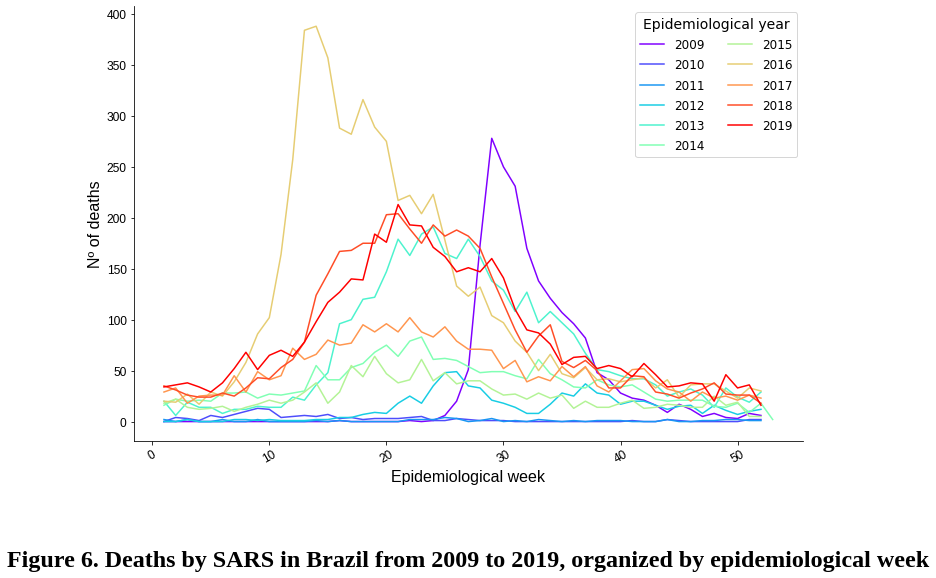

In [34]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=obito, x='Semana epidemiológica', y='Casos semanais reportados até a última atualização', hue='Ano epidemiológico', palette='rainbow')
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figure 6. Deaths by SARS in Brazil from 2009 to 2019, organized by epidemiological week', 
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Nº of deaths', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Epidemiological week', fontsize=16, fontname="Liberation Sans")
sns.despine()
ax.legend([*obito['Ano epidemiológico'].unique()], fontsize=12, labelspacing=0.6, 
          title='Epidemiological year', title_fontsize=14, ncol=2)
plt.show()

<font color = 'blue'> >> </font> After removing 2020, we see how the graph looks a little more homogeneous. Still, the years 2009 and 2016 stand out a lot. 

**2009**: It is important to remember that 2009 was the year in which the swine flu epidemic (caused by the Influenza A - H1N1 virus) happened. Although swine flu is not necessarily more lethal, a problem faced was that the population as a whole was more susceptible to the virus and annual vaccines did not provide protection against this viral strain. [Reference](https://www.cdc.gov/flu/pandemic-resources/2009-h1n1-pandemic.html) 

Another point that draws attention is the difference in the seasonality of deaths from SARS in 2009 vs. other years. One possibility would be the time it took for the epidemic to arrive, settle and be detected in Brazil. Probably, if we assessed cases in early affected countries, the 2009 seasonality could be more similar. 

**2016**: In addition to 2009, there was also an H1N1 Influenza epidemic in 2016. Unlike the 2009 pandemic, the world was already better prepared and vaccines distributed worldwide already better protected the population.


**Obs***: The InfoGripe bank starts with data referring to 2009. It is possible that there is an interference in the actual distribution observed due to the beginning of the effort to record this type of information.

### <font color='red'> >> </font> What if we remove 2009 and 2016? How about we also use the moving average?

<font color = 'gray'> >> </font> In general, the moving average helps us to analyze the behavior of our data, reducing small noises. Although there are several types, some examples can be found at this [link](https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d). According to the [dictionary](https://gitlab.procc.fiocruz.br/mave/repo/tree/master/Dados/InfoGripe) of data from the InfoGripe database, the moving average was calculated for a period of 3 weeks.

In [35]:
obito = obito.query('`Ano epidemiológico` != "2009" & `Ano epidemiológico` != "2016"')

In [36]:
obito['Ano epidemiológico'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019])

<font color = 'gray'> >> </font> Now, let's plot the moving average of cases per epidemiological week in each year and also a grouping per epidemiological week using only the average of deaths.

**Obs***: I decided to make the average of deaths per epidemiological week, because making the average of the moving averages did not seem to me to be very "responsible".

In [37]:
obito_plot = obito.groupby('Semana epidemiológica')

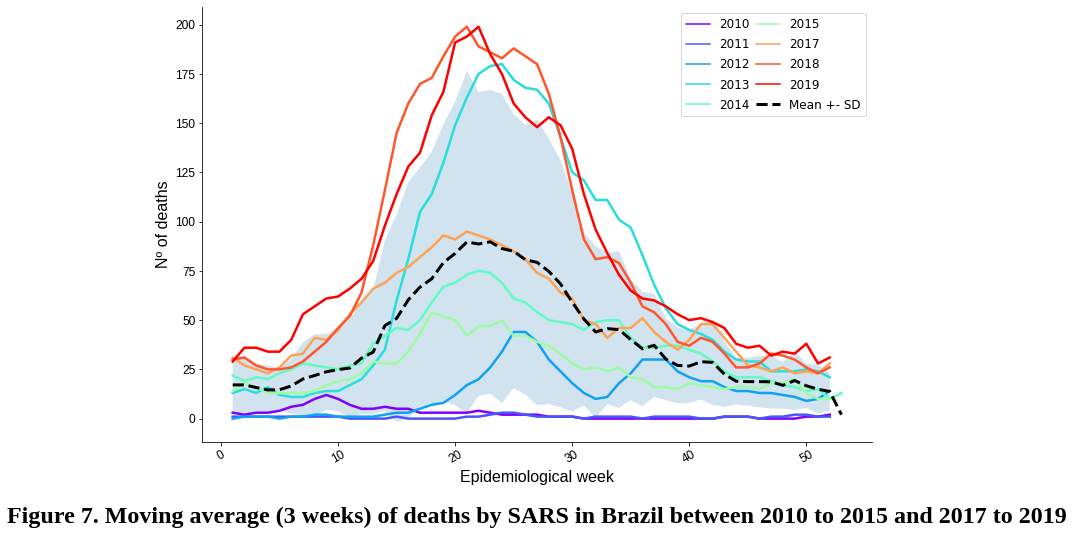

In [38]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=obito, x='Semana epidemiológica', y='média móvel', ci='sd', 
                  palette='rainbow', hue='Ano epidemiológico', legend='full', linewidth=2.5)
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figure 7. Moving average (3 weeks) of deaths by SARS in Brazil between 2010 to 2015 and 2017 to 2019', 
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.ylabel('Nº of deaths', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Epidemiological week', fontsize=16, fontname="Liberation Sans")
sns.despine()
x = obito['Semana epidemiológica'].unique()
y_est = obito_plot.mean()['Casos semanais reportados até a última atualização']
y_err = obito_plot.std()['Casos semanais reportados até a última atualização']
ax.plot(x, y_est, 'k--', label='Mean +- SD', linewidth=3)
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

ax.legend(fontsize=12, labelspacing=0.6, ncol=2, columnspacing=0.5, fancybox=True)

plt.show()

<font color = 'blue'> >> </font> Now we have a general idea of how deaths from SARS are distributed in epidemiological weeks, year by year. Although somewhat variable, we note that, in general, deaths peak between epidemiological week 20 and 25, corresponding to the end of May and the beginning of June. If we focus on the mean (*dashed*) and standard deviation (*area filled in the graph*) of deaths by weekly SARS, we see this distribution summarized. Thus, we note the seasonality of deaths from SARS in Brazil.

##  Uniting databases

In [39]:
url = "https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/casos_full_grouped.csv.gz?raw=true"
casos_full_pais = pd.read_csv(url, compression='gzip')

In [40]:
casos_full_pais.head()

,epidemiological_week,city_ibge_code,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,9,175.0,2.314467e+08,2.295952e+08,0.0,0.0,7,0.01512,0.0000,0,15,2,0
1,10,551.0,4.212325e+08,4.180455e+08,0.0,1.0,50,0.23754,0.0000,0,79,17,0
2,11,2629.0,9.723243e+08,9.655304e+08,0.0,14.0,443,3.10819,0.0000,0,399,117,0
3,12,4692.0,1.357063e+09,1.346966e+09,0.0,19.0,3980,40.86336,0.1825,40,1230,996,18
4,13,5502.0,1.482290e+09,1.471030e+09,0.0,7.0,18782,204.97605,1.1806,450,2485,2821,97


In [41]:
casos_full_pais.columns

Index(['epidemiological_week', 'city_ibge_code', 'estimated_population',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'new_confirmed', 'new_deaths'],
      dtype='object')

In [42]:
# Creating new columns for moving averages of deaths and cases 
casos_full_pais['media_movel_obitos'] = casos_full_pais['new_deaths'].rolling(window=3).mean()
casos_full_pais['media_movel_casos'] = casos_full_pais['new_confirmed'].rolling(window=3).mean()

In [43]:
# Before proceeding with the analysis, I created here three dataframes containing information regarding the
# epidemic years of H1N1
obito_pais = gripe_pais.query("dado == 'obito'")
obito_h1 = obito_pais.query('`Ano epidemiológico` == "2009" | `Ano epidemiológico` == "2016"')
obito_2016 = obito_pais.query('`Ano epidemiológico` == "2016"')
obito_2009 = obito_pais.query('`Ano epidemiológico` == "2009"')

In [44]:
lista = ['epidemiological_week', 'new_confirmed', 'new_deaths', 'media_movel_obitos',
       'media_movel_casos']
full = casos_full_pais[lista]

# Adding columns containing the SRAG moving averages studied so far.
full['srag_h1n1'] = (obito_h1.groupby('Semana epidemiológica').mean().
                     loc[9:48]['Casos semanais reportados até a última atualização'])
full['srag_2009'] = (obito_2009['média móvel'][9:48].tolist())
full['srag'] = (obito.groupby('Semana epidemiológica').mean().
                loc[9:47]['Casos semanais reportados até a última atualização'].tolist())
full['srag_2016'] = (obito_2016['média móvel'][9:48].tolist())

full.set_index('epidemiological_week', inplace=True)


### <font color='red'> >> </font>Distribution of deaths by Covid-19 (Brasil.io) versus non-epidemic SARS deaths

Moving average deaths per covid-19 (2020) versus average weekly deaths from SARS from 2009 to 2019, removing the epidemic years of H1N1 (2009 and 2016)

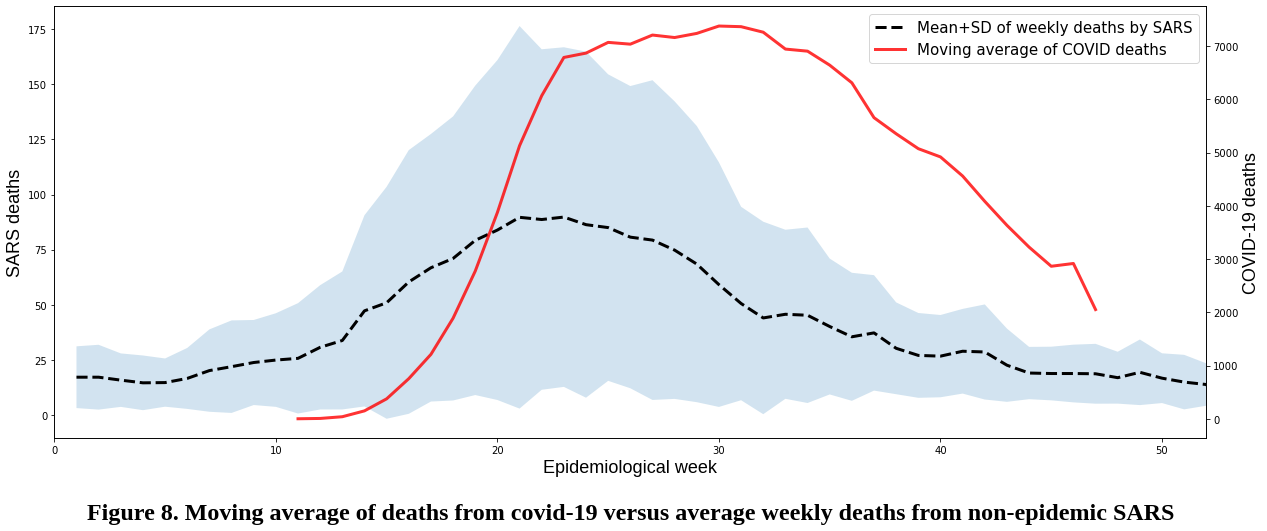

In [45]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()

x = obito['Semana epidemiológica'].unique()
y_est = obito_plot.mean()['Casos semanais reportados até a última atualização']
y_err = obito_plot.std()['Casos semanais reportados até a última atualização']

lns1 = ax1.plot(x, y_est, 'k--', label='Mean+SD of weekly deaths by SARS', linewidth=3)

# lns1 = ax1.plot(full['srag'], color='black', linestyle='dashed', 
#                 lw=4, alpha=alpha, label='Média de óbitos por SRAG' )
lns2 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='Moving average of COVID deaths' )

ax1.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

ax1.set_ylabel('SARS deaths', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('COVID-19 deaths', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Epidemiological week', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figure 8. Moving average of deaths from covid-19 versus average weekly deaths from non-epidemic SARS',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
plt.show()

<font color = 'blue'> >> </font> We noticed the similarity in the slope of the curves, despite the peaks not being superimposed in the same epidemiological week. It is possible that this shift is caused by the "late" onset of covid-19 cases compared to other countries. Possibly, when analyzing data from countries hit earlier by covid-19, we would have more similar distributions. As Brazil "took a while" to be affected by the pandemic, isolation measures could be taken beforehand, thus "halting" the advance of cases and, consequently, of deaths.

Unfortunately, as we know, containment measures have not been maintained for as long as necessary and case tracking has not been carried out efficiently. 

Additionally, we have the epidemic character shown by COVID-19, which can change the distribution of cases. 

***Obs**: Brazil is a huge and diverse country. Rates of access to health, control and distancing measures vary widely from municipality to municipality and we have had several realities of the pandemic in our country.

## <font color='red'> >> </font>Is the epidemiological distribution of deaths by covid-19 more similar to the distribution of deaths by SARS in H1N1 epidemic situations?


### Deaths Covid-19 BRAZIL.io versus deaths SRAG 2009

Moving average of deaths by covid-19 (2020) versus weekly deaths from SRAG in 2009

<font color = 'gray'> >> </font> I decided to work with the 2009 SRAG data to make the comparison. As we live in 2020, in 2009 the virus that caused the H1N1 pandemic found the population without formed immunity. In this way, the virus reached pandemic levels, showing a distribution of deaths quite different from that seen for the common flu.

In 2016, on the other hand, flu vaccines had already been updated with the 2009 strain, changing the distribution of deaths.

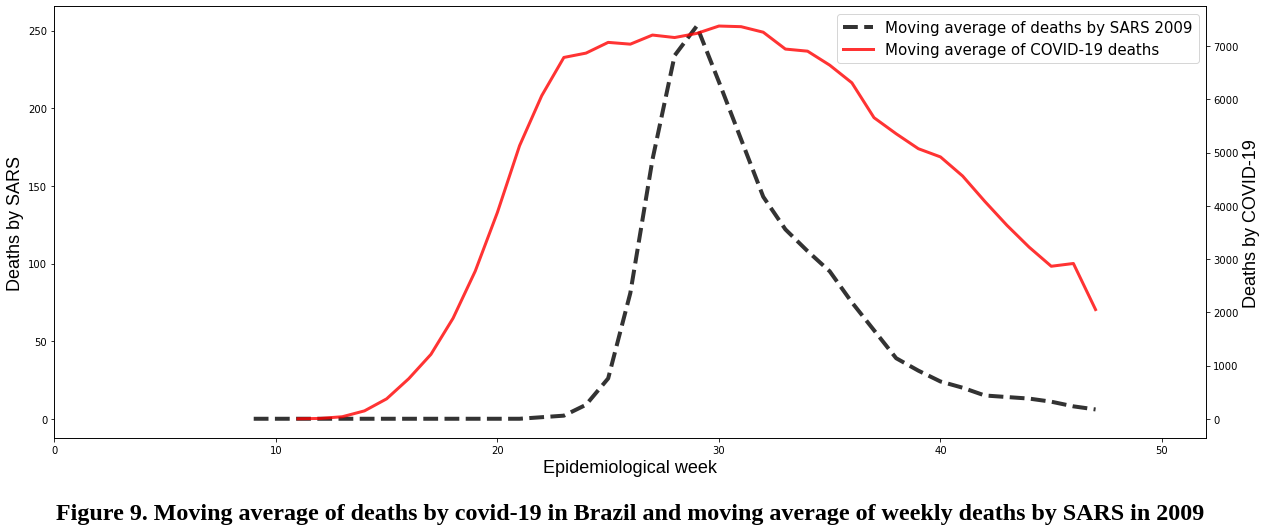

In [46]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()


lns1 = ax1.plot(full['srag_2009'], color='black', linestyle='dashed', 
                lw=4, alpha=alpha, label='Moving average of deaths by SARS 2009')
lns2 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='Moving average of COVID-19 deaths')

ax1.set_ylabel('Deaths by SARS', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Deaths by COVID-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Epidemiological week', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figure 9. Moving average of deaths by covid-19 in Brazil and moving average of weekly deaths by SARS in 2009',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
# plt.grid()
plt.show()

<font color = 'blue'> >> </font> We noticed how the epidemiological weeks of death onset differ between the two pandemics. Interestingly, the growth of cases appears to be similar.

***Obs**: The InfoGripe database starts recording in 2009. Possibly, the collection of SRAG information was not done as accurately before this period.

##  <font color='red'> >> </font> What if we evaluate deaths by COVID reported in the InfoGripe database? Will the behavior of the curves be the same?

In [47]:
obito_covid = gripe_pais.query("dado == 'obitocovid'")

In [48]:
obito_covid = obito_covid.query('`Ano epidemiológico` == "2020"')

In [49]:
obito_covid.set_index('Semana epidemiológica', inplace=True)

In [50]:
full_slice = full.loc[8:44]

obito_covid_slice = obito_covid.loc[9:44]

full_slice['obito_sra_covid'] = obito_covid_slice['média móvel']

In [51]:
full_slice.head(2)

,new_confirmed,new_deaths,media_movel_obitos,media_movel_casos,srag_h1n1,srag_2009,srag,srag_2016,obito_sra_covid
epidemiological_week,,,,,,,,,
9,2,0,NaN,NaN,NaN,0.0,23.777778,117.0,24.0
10,17,0,NaN,NaN,NaN,0.0,24.888889,174.0,100.0


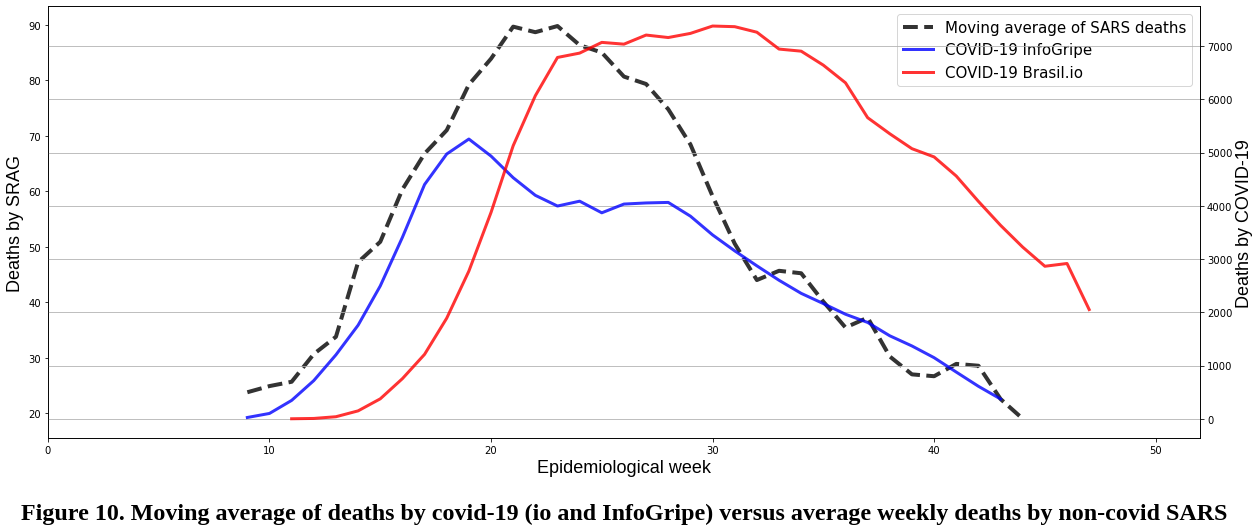

In [52]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()


lns1 = ax1.plot(full_slice['srag'], color='black', linestyle='dashed', 
                lw=4, alpha=alpha, label='Moving average of SARS deaths' )
lns2 = ax2.plot(full_slice['obito_sra_covid'], color='blue', 
                lw=line_weight, alpha=alpha, label='COVID-19 InfoGripe' )
lns3 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='COVID-19 Brasil.io' )

ax1.set_ylabel('Deaths by SRAG', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Deaths by COVID-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Epidemiological week', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2 + lns3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figure 10. Moving average of deaths by covid-19 (io and InfoGripe) versus average weekly deaths by non-covid SARS',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
plt.grid()
plt.show()

<font color = 'blue'> >> </font> We note here differences between the two databases. This difference is probably due to the way information is collected, the frequency of updates, among others.

What draws the most attention is how the data of **deaths due to SRAG (InfoGripe)** (from 2009 to 2020, without epidemic years) has distribution in epidemiological weeks quite similar to the data of <font color = 'Blue'> deaths by covid-19 (InfoGripe) </font>, while this similarity is not repeated when comparing the <font color = 'Red'> deaths by covid registered in the Brasil.IO database </font>.

Despite the differences, we notice how these curves behave similarly

# Conclusions

The covid-19 pandemic presented several challenges for society, causing irreparable losses. Still, many downplay and discredit science.

My work aimed to assess the seasonality of deaths by SARS, compared to deaths by covid-19. Although we only have 2020 records, SarS-CoV2 also appears to follow a form of seasonal transmission. This has also been reported by other coronaviruses that cause milder symptoms. 

Thus, we have to prepare for the future and only the collaboration of EVERYONE in society can minimize unnecessary losses.

# Future perspectives

### How about the staes?
<font color='Red'> >>> </font> Could it be that the states with the highest number of deaths due to SARS-non-covid are also the ones most affected by Covid-19 in 2020?

### How similar are the epidemiological curves of epidemic and non-epidemic covid and SARS?
<font color = 'Red'> >>> </font> Statistically analyze the acceleration of these curves and the coefficient of variation. <br>

### Is it possible to model future SRAG behaviors based on the available data?
<font color = 'Red'> >>> </font> I still don't know how to do it, but I would like to train this type of inference. This type of analysis has several limitations, especially considering the context of the pandemic we are in, but it will serve as a great learning opportunity.

### How does the people's movement relate to the covid-19 cases?
<font color = 'red'> >> </font> Use google's [records](https://www.google.com/covid19/mobility/) to evaluate.